# Character Segmentation

In handwritten Character recognition, It is most important to segment the characters out of it for recognition. Extracting characters helps to reduce complexity for recognition of the handwritten text.In Devanagari script characters are written under *shirorekha*(**Dika**) and there are varities of way in which people write *shirorekha*(**Dika**) which makes character segmentation a tough job.



In [1]:
import line_word_segmentation
import os
import cv2
import copy_of_charactersegementation as rec

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def wordSegmentation(imagePath):
    x = line_word_segmentation.line_segmentation()
    img = cv2.imread(imagePath)
    x.linewordSegementation(img)
    images = os.listdir("i/")
    strings  = [[] for i in images]
    string2 = [[] for i in images]
    return images,strings

In [3]:
def getString(images,strings):
    for i in range(0,len(images)):
        x = rec.Recog()
        char = x.Segmentation(cv2.imread("i/"+str(i)+".png",0),str(i))
        img  = cv2.imread("i/" + str(i) + ".png", 0)
        img = cv2.resize(img, (int(img.shape[1]/img.shape[0])*50,50), cv2.INTER_CUBIC)
        img = cv2.dilate(img,np.zeros((3,3),np.uint8))
        os.remove("i/"+str(i)+".png")
        strings[i].append(char)
    return strings

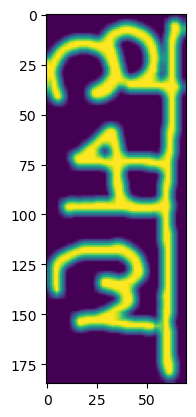

1/1 [==============================] - 0s 128ms/step


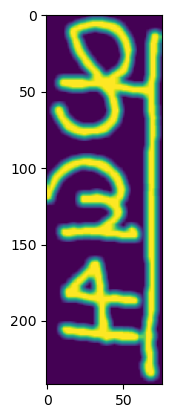

1/1 [==============================] - 0s 143ms/step


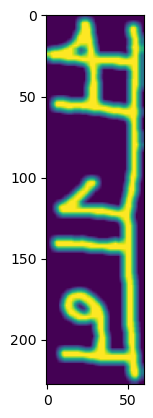

1/1 [==============================] - 0s 191ms/step


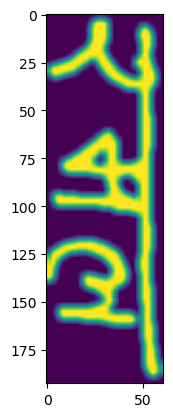

1/1 [==============================] - 0s 195ms/step


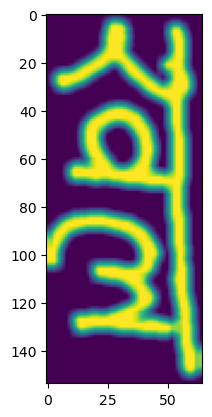

1/1 [==============================] - 0s 188ms/step


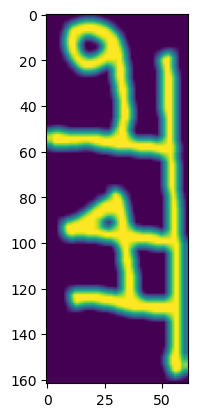

1/1 [==============================] - 0s 191ms/step


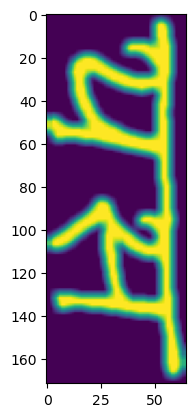

1/1 [==============================] - 0s 190ms/step


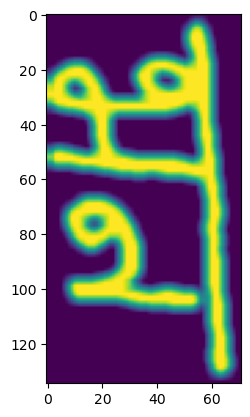

1/1 [==============================] - 0s 188ms/step


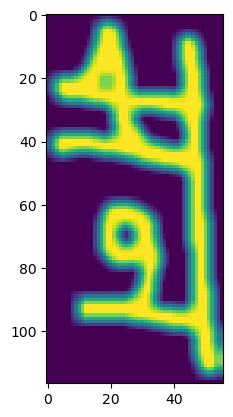

1/1 [==============================] - 0s 193ms/step


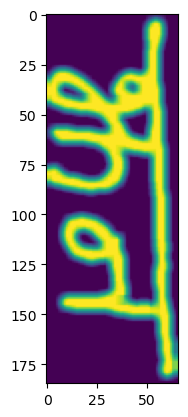

1/1 [==============================] - 0s 190ms/step


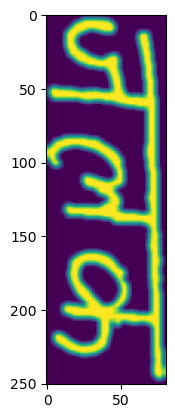

1/1 [==============================] - 0s 187ms/step


In [ ]:
from PyQt5 import QtGui
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout,QHBoxLayout, QPushButton, QFileDialog, QLabel, QTextEdit,QPlainTextEdit
import sys

from PyQt5.QtGui import QPixmap


class Window(QWidget):
    def __init__(self):
        super().__init__()

        self.title = "HandWritten Devanagari Character Recognition"
        self.top = 10
        self.left = 100
        self.width = 1800
        self.height = 900
        self.imagePath = ""
        self.listOfStrings = []
        self.InitWindow()

    def InitWindow(self):
        self.setWindowIcon(QtGui.QIcon("KaIcon.png"))
        self.setWindowTitle(self.title)
        self.setGeometry(self.left, self.top, self.width, self.height)

        vbox = QVBoxLayout()
        
        hbox= QHBoxLayout()
        self.b = QPlainTextEdit()
    
      
        

        self.btn1 = QPushButton("Open Image")
        self.btn1.clicked.connect(self.getImage)
        self.recogButton = QPushButton("Recognize the Image alongside .")
        self.recogButton.clicked.connect(self.Recognize)

        vbox.addWidget(self.btn1)

        self.label = QLabel("Hello")
        hbox.addWidget(self.label)
        
        self.v2Box = QVBoxLayout()
        
        
        self.v2Box.addWidget(self.recogButton)
     
        hbox.addLayout(self.v2Box)
        vbox.addLayout(hbox)
        self.setLayout(vbox)
        

    def getImage(self):
        fname = QFileDialog.getOpenFileName(self, 'Open file')

        imagePath = fname[0]
        pixmap = QPixmap(imagePath)
        pixmap = pixmap.scaledToWidth(self.width//4)
        self.label.setPixmap(QPixmap(pixmap))
        self.resize(pixmap.width(), pixmap.height())
        
        self.imagePath = imagePath
    def Recognize(self):
        images,strings = wordSegmentation(self.imagePath)
        self.listOfStrings = getString(images,strings)
        self.b.clear()
        self.b.move(0,500)
   
        font = QtGui.QFont()
        font.setPointSize(16)
        self.b.setFont(font)
        self.resize(1000,800)
        string = " "
        for each in self.listOfStrings:
            string+=str(each[0]) + "  "
            
        self.b.insertPlainText(string)
        self.v2Box.addWidget(self.b)
        
        

App = QApplication(sys.argv)
window = Window()
window.show()
sys.exit(App.exec_())